In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Feature Extraction
A core step for a typical statistical NLP component is to convert raw or annotated text into features, which give a machine learning model a simpler, more focused view of the text. 

## Count Vectorizer
- CountVectorizer can lowercase letters, disregard punctuation and stopwords, but it can't LEMMATIZE or STEM

**Def:**
CountVectorizer are those which changes string to a numerical form by counting the no of words. 

In [1]:
txt = ["He is ::having a great Time, at the park time?",
       "She, unlike most women, is a big player on the park's grass.",
       "she can't be going"]

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
# Initialize a CountVectorizer object: count_vectorizer
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None)

# Transforms the data into a bag of words
count_train = count_vec.fit(txt)
bag_of_words = count_vec.transform(txt)

# Print the first 10 features of the count_vec
print("Every feature:\n{}".format(count_vec.get_feature_names()))
print("\nEvery 3rd feature:\n{}".format(count_vec.get_feature_names()[::3]))

Every feature:
['big', 'going', 'grass', 'great', 'having', 'park', 'player', 'time', 'unlike', 'women']

Every 3rd feature:
['big', 'great', 'player', 'women']


## Vocabulary Count

In [4]:
print("Vocabulary size: {}".format(len(count_train.vocabulary_)))
print("Vocabulary content:\n {}".format(count_train.vocabulary_))

Vocabulary size: 10
Vocabulary content:
 {'having': 4, 'great': 3, 'time': 7, 'park': 5, 'unlike': 8, 'women': 9, 'big': 0, 'player': 6, 'grass': 2, 'going': 1}


### N-grams (sets of consecutive words)
- N=2

In [5]:
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 2), max_df=1.0, min_df=1, max_features=None)

count_train = count_vec.fit(txt)
bag_of_words = count_vec.transform(txt)

print(count_vec.get_feature_names())

['big', 'big player', 'going', 'grass', 'great', 'great time', 'having', 'having great', 'park', 'park grass', 'park time', 'player', 'player park', 'time', 'time park', 'unlike', 'unlike women', 'women', 'women big']


- N=3

In [6]:
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 3), max_df=1.0, min_df=1, max_features=None)

count_train = count_vec.fit(txt)
bag_of_words = count_vec.transform(txt)

print(count_vec.get_feature_names())

['big', 'big player', 'big player park', 'going', 'grass', 'great', 'great time', 'great time park', 'having', 'having great', 'having great time', 'park', 'park grass', 'park time', 'player', 'player park', 'player park grass', 'time', 'time park', 'time park time', 'unlike', 'unlike women', 'unlike women big', 'women', 'women big', 'women big player']


## Min_df
**Min_df ignores terms that have a document frequency (presence in % of documents) strictly lower than the given threshold. For example, Min_df=0.66 requires that a term appear in 66% of the docuemnts for it to be considered part of the vocabulary.**

- Sometimes min_df is used to limit the vocabulary size, so it learns only those terms that appear in at least 10%, 20%, etc. of the documents.

In [8]:
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=1.0, min_df=0.6, max_features=None)

count_train = count_vec.fit(txt)
bag_of_words = count_vec.transform(txt)

print(count_vec.get_feature_names())
print("\nOnly 'park' becomes the vocabulary of the document term matrix (dtm) because it appears in 2 out of 3 documents, \
meaning 0.66% of the time.\
      \nThe rest of the words such as 'big' appear only in 1 out of 3 documents, meaning 0.33%. which is why they don't appear")

['park']

Only 'park' becomes the vocabulary of the document term matrix (dtm) because it appears in 2 out of 3 documents, meaning 0.66% of the time.      
The rest of the words such as 'big' appear only in 1 out of 3 documents, meaning 0.33%. which is why they don't appear


## Max_df
**When building the vocabulary, it ignores terms that have a document frequency strictly higher than the given threshold. This could be used to exclude terms that are too frequent and are unlikely to help predict the label. For example, by analyzing reviews on the movie Lion King, the term 'Lion' might appear in 90% of the reviews (documents), in which case, we could consider establishing Max_df=0.89**

In [9]:
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=0.50, min_df=1, max_features=None)

count_train = count_vec.fit(txt)
bag_of_words = count_vec.transform(txt)

print(count_vec.get_feature_names())
print("\nOnly 'park' is ignored because it appears in 2 out of 3 documents, meaning 0.66% of the time.")

['big', 'going', 'grass', 'great', 'having', 'player', 'time', 'unlike', 'women']

Only 'park' is ignored because it appears in 2 out of 3 documents, meaning 0.66% of the time.


## Max_features
**Limit the amount of features (vocabulary) that the vectorizer will learn**

In [10]:
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=4)

count_train = count_vec.fit(txt)
bag_of_words = count_vec.transform(txt)

print(count_vec.get_feature_names())

['big', 'going', 'park', 'time']


# TfidfVectorizer -- Brief Tutorial
- The goal of using tf-idf is to scale down the impact of tokens that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus. 

**formula used: tf-idf(d, t) = tf(t) * idf(d, t)**
- tf(t)= the term frequency is the number of times the term appears in the document
- idf(d, t) = the document frequency is the number of documents 'd' that contain term 't'

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
txt1 = ['His smile was not perfect', 'His smile was not not not not perfect', 'she not sang']
tf = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word')
txt_fitted = tf.fit(txt1)
txt_transformed = txt_fitted.transform(txt1)
print ("The text: ", txt1)

The text:  ['His smile was not perfect', 'His smile was not not not not perfect', 'she not sang']


In [14]:
tf.vocabulary_

{'his': 0, 'smile': 5, 'was': 6, 'not': 1, 'perfect': 2, 'she': 4, 'sang': 3}

**IDF:** The inverse document frequency



In [15]:
idf = tf.idf_
print(dict(zip(txt_fitted.get_feature_names(), idf)))
print("\nWe see that the tokens 'sang','she' have the most idf weight because \
they are the only tokens that appear in one document only.")
print("\nThe token 'not' appears 6 times but it is also in all documents, so its idf is the lowest")

{'his': 1.4054651081081644, 'not': 1.0, 'perfect': 1.4054651081081644, 'sang': 2.09861228866811, 'she': 2.09861228866811, 'smile': 1.4054651081081644, 'was': 1.4054651081081644}

We see that the tokens 'sang','she' have the most idf weight because they are the only tokens that appear in one document only.

The token 'not' appears 6 times but it is also in all documents, so its idf is the lowest


**Graphing inverse document frequency**

In [16]:
rr = dict(zip(txt_fitted.get_feature_names(), idf))

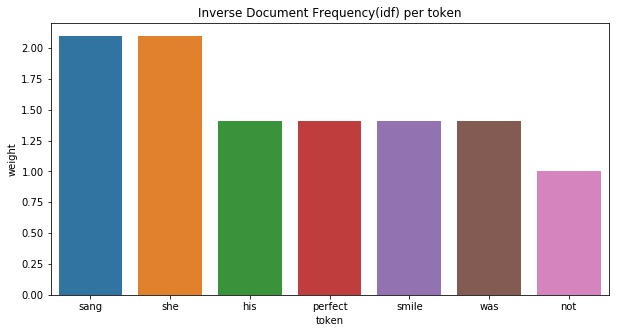

In [23]:
token_weight = pd.DataFrame.from_dict(rr, orient='index').reset_index()
token_weight.columns=('token','weight')
token_weight = token_weight.sort_values(by='weight', ascending=False)
token_weight 

sns.barplot(x='token', y='weight', data=token_weight)            
plt.title("Inverse Document Frequency(idf) per token")
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.show()

In [26]:
# get feature names
feature_names = np.array(tf.get_feature_names())
sorted_by_idf = np.argsort(tf.idf_)
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:3]]))
print("\nFeatures with highest idf:\n{}".format(
       feature_names[sorted_by_idf[-3:]]))

Features with lowest idf:
['not' 'his' 'perfect']

Features with highest idf:
['was' 'sang' 'she']


In [27]:
print("The token 'not' has  the largest weight in document #2 because it appears 3 times there. But in document #1\
 its weight is 0 because it does not appear there.")
txt_transformed.toarray()

The token 'not' has  the largest weight in document #2 because it appears 3 times there. But in document #1 its weight is 0 because it does not appear there.


array([[1.40546511, 1.        , 1.40546511, 0.        , 0.        ,
        1.40546511, 1.40546511],
       [1.40546511, 4.        , 1.40546511, 0.        , 0.        ,
        1.40546511, 1.40546511],
       [0.        , 1.        , 0.        , 2.09861229, 2.09861229,
        0.        , 0.        ]])

**TF-IDF -** Maximum token value throughout the whole dataset

In [28]:
new1 = tf.transform(txt1)

# find maximum value for each of the features over all of dataset:
max_val = new1.max(axis=0).toarray().ravel()

#sort weights from smallest to biggest and extract their indices 
sort_by_tfidf = max_val.argsort()

print("Features with lowest tfidf:\n{}".format(
      feature_names[sort_by_tfidf[:3]]))

print("\nFeatures with highest tfidf: \n{}".format(
      feature_names[sort_by_tfidf[-3:]]))

Features with lowest tfidf:
['his' 'perfect' 'smile']

Features with highest tfidf: 
['sang' 'she' 'not']
